# Discrimination in Tennis: An Examination of Age and Territorial Biases

DSCI 100 \

#### *INTRODUCTION*

Tennis has been an integral sport within the world since 1890. Many global tournaments are held each year in major cities such as Melbourn,
Paris, London, and New York City, with prize pools of over 50 million! Given this sport with such historical value and a global presence, 
we wanted to explore any **potential biases** through **age** or **country of origin** within the international tennis community. We achieve this by
examining a dataset of the top 500 tennis players in the world, and visualizing money per player through age group and country of origin. 

***Our Question:*** Can the top ranking countries and the varying ages between tennis players be used to predict their competition winnings, and does this reveal an underlying partiality between the factors?

***Classifier:*** Earnings\
***Predictors:*** Country, Age, Ranks(?)\
***Dataset:*** Tennis Player Stats for Top 500 Players

#### *PRELIMINARY EXPLORATORY DATA ANALYSIS*


In [1]:
library(tidyverse)
library(repr)
library(tidymodels)
library(stringr)

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.2     ✔ purrr   0.3.4
✔ tibble  3.0.3     ✔ dplyr   1.0.2
✔ tidyr   1.1.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

Warning message:
“package ‘ggplot2’ was built under R version 4.0.1”
Warning message:
“package ‘tibble’ was built under R version 4.0.2”
Warning message:
“package ‘tidyr’ was built under R version 4.0.2”
Warning message:
“package ‘dplyr’ was built under R version 4.0.2”
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()

Warning message:
“package ‘tidymodels’ was built under R version 4.0.2”
── Attaching packages ────────────────────────────────────── tidymodels 0.1.1 ──

✔ broom     0.7.0      ✔ recipes   0.1.13
✔ dials     0.0.9      ✔ rsample   0.0.7 
✔ infer     0.5.4      ✔ tune      0.1.1 
✔ modeldata 0.0.2      ✔ workflows 0.2.0 
✔ parsnip   0.1.3    

In [2]:
data <- read.csv(url("https://drive.google.com/uc?export=download&id=1_MECmUXZuuILYeEOfonSGqodW6qVdhsS"))

In [3]:
data <- mutate(data, str_replace(data$Age, " \\s*\\([^\\)]+\\)", ""))
data <- mutate(data, Age = str_replace(data$Age, " \\s*\\([^\\)]+\\)", "")) 
data <- mutate(data, Current.Rank = str_replace(data$Current.Rank, " \\s*\\([^\\)]+\\)", "")) 
data <- mutate(data, Best.Rank = str_replace(data$Best.Rank, " \\s*\\([^\\)]+\\)", ""))

money <- c(data$Prize.Money)
money <- money %>%
        lapply(gsub, pattern="$", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="US", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="all-time leader in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="All-time leader in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="all-time in earnings", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="11th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="10th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="14th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="2nd", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="27th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="15th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="30th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="4th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="28th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="6th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="33rd", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="26th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="48th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="41st", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="24th", fixed=TRUE, replacement="") %>%
        lapply(gsub, pattern="15th", fixed=TRUE, replacement="")

data <- mutate(data, Prize.Money = money)

In [4]:
data_selected <- select(data, Age, Name,Country, Current.Rank, Best.Rank, Prize.Money)
data_selected <- mutate(data_selected, Prize.Money = gsub(",","",data_selected$Prize.Money))

In [5]:
tidy_data <- data_selected %>% 
        filter(Prize.Money != "") %>%
        mutate(Prize.Money = as.numeric(Prize.Money)) %>%
        mutate(Age = as.numeric(Age)) %>%
        mutate(Current.Rank = as.numeric(Current.Rank)) %>%
        mutate(Best.Rank = as.numeric(Best.Rank))

tidy_data <- drop_na(tidy_data)

Warning message:
“Problem with `mutate()` input `Prize.Money`.
ℹ NAs introduced by coercion
ℹ Input `Prize.Money` is `as.numeric(Prize.Money)`.”
Warning message in mask$eval_all_mutate(dots[[i]]):
“NAs introduced by coercion”


In [6]:
tidy_data <- initial_split(tidy_data, prop = 0.75, strata = Country)  
training_data <- training(tidy_data)   
testing_data <- testing(tidy_data)

Warning message:
“Too little data to stratify. Unstratified resampling will be used.”


`summarise()` ungrouping output (override with `.groups` argument)

`summarise()` ungrouping output (override with `.groups` argument)

New names:
* NA -> ...3



Country,n,avg_award
<chr>,<int>,<dbl>
"Bolivia, Plurinational State of",1,397175.0
Bulgaria,1,132871.0
Denmark,1,72127.0
Dominican Republic,1,151729.0
Egypt,1,98772.0
El Salvador,1,627102.0
Estonia,1,1119928.0
Georgia,1,4271703.0
"Moldova, Republic of",1,3128654.0


Country,n,avg_award
<chr>,<int>,<dbl>
Japan,8,3840161
Serbia,10,16664116
Argentina,13,3645960
Russian Federation,13,2336195
Australia,15,1317347
Germany,16,3059431
Spain,24,8220496
Italy,25,1946041
France,26,2774667


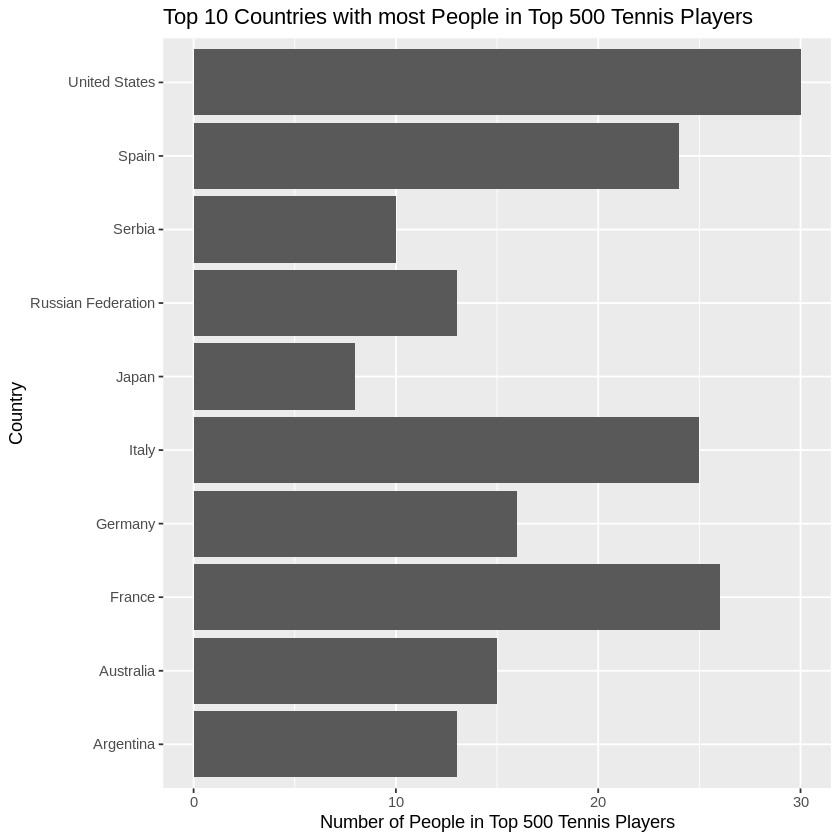

In [23]:
table1 <- training_data %>%
    group_by(Country) %>%
    summarize(avg_award = mean(Prize.Money)) 

avg_award <- table1$avg_award
    
final_table <- training_data %>%
    group_by(Country) %>%
    summarize(n = n()) %>%
    bind_cols(avg_award) %>%
    mutate(avg_award = ...3) %>%
    select(-...3)

final_table <- final_table %>%
        arrange(n)

top_10 <- tail(final_table, 10)

top_10_graph <- ggplot(top_10,aes(x = Country, y = n)) +
        geom_bar(stat = "identity") +
        labs(x = "Country", y = "Number of People in Top 500 Tennis Players") +
        ggtitle("Top 10 Countries with most People in Top 500 Tennis Players") +
        coord_flip()

tibble(final_table)

top_10_graph

#### *METHODS*
We strive to discover the significance of the country of origin and age of a tennis player when looking at their chances to win prizes. To achieve this goal, we will examine how many players there are per country and their age, and compare it with the amount of money made per country.

We will use the **country column** to derive how many players there are per country, then the **age and prize money columns** to assess the correlation between the variables. In order to reduce bias, we will compare the **average ranking** of all the players in  countries when drawing conclusions.

We will use **histograms** to visualize how much money different age groups make, and **bar graphs** to visualize how much money different countries make. 

#### *EXPECTED OUTCOMES AND SIGNIFICANCE*

***What do you expect to find?*** \
Knowing the US's competitive nature, we expect **US players** to earn the most prize money out of all the countries given in our data set. We also expect **younger players** to make more overall given their potential.

***What impact could such findings have?*** \
Obtaining evidence on the top earning players’ ethnicity could reveal potential **biases** or underlying **discrimination** towards a country in tennis. As more research is done towards sport-related biases (such as age and ethnicity), we hope that the insights provided by research can aspire the sports industry to make **fair** and **inclusive** sporting events for all players. In the perspective of tennis coaches, this data could be used to recruit prospective tennis players.

***What future questions could this lead to?***
Since our data analysis is only limited to tennis, it poses the question if other sports, such as soccer, football, and baseball, **have the same biases?** If not, what other predictors would have more weight than predictors used in our predicting model? 